In [12]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [13]:
#load dataset
df = pd.read_csv('Queens_Midtown_Tunnel.csv')
df.head()

,Date,Total,Day
0,2010010100,416,Friday
1,2010010101,532,Friday
2,2010010102,529,Friday
3,2010010103,381,Friday
4,2010010104,315,Friday


In [14]:
#look at the distribution of the Total cars
df["Total"].describe()

count    61536.000000
mean      1767.652626
std       1064.844880
min          0.000000
25%        883.000000
50%       1896.000000
75%       2550.000000
max       4497.000000
Name: Total, dtype: float64

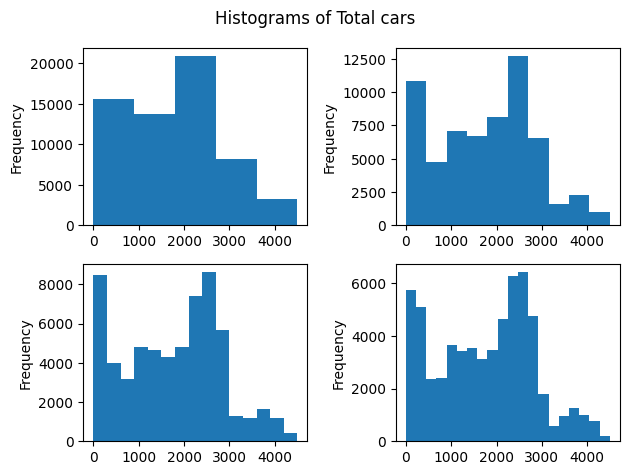

In [15]:
#bucket the data into 10, 15, 20, 25 bins and plot histograms
fig, axs = plt.subplots(2, 2)
fig.suptitle('Histograms of Total cars')
df["Total"].plot.hist(bins=5, ax=axs[0,0])
df["Total"].plot.hist(bins=10, ax=axs[0,1])
df["Total"].plot.hist(bins=15, ax=axs[1,0])
df["Total"].plot.hist(bins=20, ax=axs[1,1])
plt.tight_layout()
plt.show()

In [16]:
#adding buckets corresponding to each bin size
df["Bucket-05"] = pd.cut(df["Total"], bins=5, labels=False)
df["Bucket-10"] = pd.cut(df["Total"], bins=10, labels=False)
df["Bucket-15"] = pd.cut(df["Total"], bins=15, labels=False)
df["Bucket-20"] = pd.cut(df["Total"], bins=20, labels=False)
df.head()

,Date,Total,Day,Bucket-05,Bucket-10,Bucket-15,Bucket-20
0,2010010100,416,Friday,0,0,1,1
1,2010010101,532,Friday,0,1,1,2
2,2010010102,529,Friday,0,1,1,2
3,2010010103,381,Friday,0,0,1,1
4,2010010104,315,Friday,0,0,1,1


In [17]:
#convert the date to the row number instead
#set the date column to be the index
df["Date"] = df.reset_index().index
df.rename(columns={'Date': 'Time'}, inplace=True)
df.head()


,Time,Total,Day,Bucket-05,Bucket-10,Bucket-15,Bucket-20
0,0,416,Friday,0,0,1,1
1,1,532,Friday,0,1,1,2
2,2,529,Friday,0,1,1,2
3,3,381,Friday,0,0,1,1
4,4,315,Friday,0,0,1,1


In [18]:
#convert dataset into CTMC-friendly format

def convert_data(column_name):
    new_df = []

    currentBucket = 0
    startTime = 0
    currSum = 0
    for index, row in df.iterrows():
        if row[column_name] == currentBucket:
            currSum += row["Total"]
        else:
            new_df.append([currentBucket, startTime, row["Time"], currSum])
            currentBucket = row[column_name]
            startTime = row["Time"]
            currSum = row["Total"]
        
    new_df.append([currentBucket, startTime, row["Time"], currSum])
    new_df = pd.DataFrame(new_df, columns=["State", "Start_Time", "End_Time", "Total_Cars"])
    new_df.to_csv('CTMC_QMT_'+column_name+'.csv', index=False)


In [19]:
convert_data("Bucket-05")
convert_data("Bucket-10")
convert_data("Bucket-15")
convert_data("Bucket-20")